<a href="https://colab.research.google.com/github/bringol/IA_TP_GRUPO_2/blob/dev/Dataset_no_me_comas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset: Yellow Submarine
----

Cada fila representa un hongo, cada columna contiene atributos de este.

La columna *classes* indica si el hongo es venenoso o no.

hongos | atributos
:----:   | :----:
8124     | 23


# Variables

Nombre   |  Posibles valores
:------- |  :---
cap-shape   | (bell, conical, convex, flat, knobbed, sunken)
cap-surface | (fibrous, grooves, scaly, smooth)
cap-color | (brown, buff, cinnamon, gray, green, pink, purple, red, white, yellow)
bruises | (bruises, no)
odor | (almond, anise, creosote, fishy, foul, musty, none, pungent, spicy)
gill-attachment | (attached, descending, free, notched)
gill-spacing | (close, crowded, distant)
gill-size | (broad, narrow)
gill-color | (black, brown, buff, chocolate, gray, green, orange, pink, purple, red, white, yellow)
stalk-shape | (enlarging, tapering)
stalk-root | (bulbous, club, cup, equal, rhizomorphs, rooted, missing)
stalk-surface-above-ring | (fibrous, scaly, silky, smooth)
stalk-surface-below-ring | (fibrous, scaly, silky, smooth)
stalk-color-above-ring | (brown, buff, cinnamon, gray, orange, pink, red, white, yellow)
stalk-color-below-ring | (brown, buff, cinnamon, gray, orange, pink, red, white, yellow)
veil-type | (partial, universal)
veil-color | (brown, orange, white, yellow)
ring-number | (none, one, two)
ring-type | (cobwebby, evanescent, flaring, large, none, pendant, sheathing, zone)
spore-print-color | (black, brown, buff, chocolate, green, orange, purple, white, yellow)
population | (abundant, clustered, numerous, scattered ,several, solitary)
habitat | (grasses, leaves, meadows, paths, urban, waste, woods)
classes   |  (edible, poisonous)

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Cargar los datos
mushroom_data = pd.read_csv('Yellow_Submarine.csv')

In [2]:
# Verificar valores faltantes
missing_values = mushroom_data.isnull().sum()
print("Valores faltantes en cada columna:")
print(missing_values)

Valores faltantes en cada columna:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [3]:
# Convertir todas las categorías a minúsculas
for col in mushroom_data.select_dtypes(include=['object']).columns:
    mushroom_data[col] = mushroom_data[col].str.lower()

In [4]:
# Chequar la distribución de clases
class_distribution = mushroom_data['class'].value_counts()
print(class_distribution)

class
edible     4208
poisson    3916
Name: count, dtype: int64


#Cambiar "poisson" por "poisonous"

In [5]:
# Original
print(mushroom_data['class'].value_counts())

# Cambiar el nombre 'poisson' a 'poisonous' en la columna 'class'
mushroom_data['class'] = mushroom_data['class'].replace({'poisson': 'poisonous'})

# Verificar que el cambio se haya realizado
print(mushroom_data['class'].value_counts())

class
edible     4208
poisson    3916
Name: count, dtype: int64
class
edible       4208
poisonous    3916
Name: count, dtype: int64


In [6]:
# Lista de columnas a verificar
columns_to_check = [
    'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-color', 'ring-number',
    'ring-type', 'spore-print-color', 'population',
    'habitat'
]

# Verificar la distribución de "edible" y "poisonous" para cada categoría en cada columna
for column in columns_to_check:
    print(f"Distribución de 'class' para cada valor en '{column}':")
    distribution = mushroom_data.groupby([column, 'class']).size().unstack(fill_value=0)
    print(distribution)
    print("\n")

Distribución de 'class' para cada valor en 'cap-shape':
class      edible  poisonous
cap-shape                   
bell          404         48
conical         0          4
convex       1948       1708
flat         1596       1556
knobbed       228        600
sunken         32          0


Distribución de 'class' para cada valor en 'cap-surface':
class        edible  poisonous
cap-surface                   
fibrous        1560        760
grooves           0          4
scaly          1504       1740
smooth         1144       1412


Distribución de 'class' para cada valor en 'cap-color':
class      edible  poisonous
cap-color                   
brown        1264       1020
buff           48        120
cinnamon       32         12
gray         1032        808
green          16          0
pink           56         88
purple         16          0
red           624        876
white         720        320
yellow        400        672


Distribución de 'class' para cada valor en 'bruises':
clas

In [7]:
# Verificar la distribución de valores en la columna "veil-type"
veil_type_distribution = mushroom_data['veil-type'].value_counts()
print(veil_type_distribution)


veil-type
partial    8124
Name: count, dtype: int64


In [8]:
# Remover la columna 'veil-type'
mushroom_data.drop(columns=['veil-type'], inplace=True)

#Consolidar columnas agrupando categorías en "other"

1.   Función para Consolidar Categorías Escasas: La función consolidate_categories agrupa categorías con baja frecuencia en "other".
2.   Aplicar la Consolidación: Se aplica la consolidación a las columnas especificadas.
3.   Verificar la Distribución Después de la Consolidación: Se imprime la distribución de valores en cada columna especificada después de la consolidación, agrupada por la clase (class).
4.   Resultado Esperado
El resultado mostrará la distribución de edible y poisonous para cada valor en las columnas especificadas, después de que las categorías escasas se hayan consolidado en "other".




In [9]:
# Función para consolidar categorías escasas
def consolidate_categories(df, column, min_count=50):
    value_counts = df[column].value_counts()
    to_consolidate = value_counts[value_counts < min_count].index
    df[column] = df[column].apply(lambda x: 'other' if x in to_consolidate else x)
    return df

# Especificar las columnas a consolidar
columns_to_consolidate = [
    'cap-shape', 'cap-color', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'ring-type', 'spore-print-color'
]

# Aplicar la consolidación a las columnas específicas
for column in columns_to_consolidate:
    mushroom_data = consolidate_categories(mushroom_data, column, min_count=50)

# Verificar la distribución después de la consolidación
for column in mushroom_data.columns:
    if column != 'class':
        print(f"Distribución de 'class' para cada valor en '{column}':")
        distribution = mushroom_data.groupby([column, 'class']).size().unstack(fill_value=0)
        print(distribution)
        print("\n")

Distribución de 'class' para cada valor en 'cap-shape':
class      edible  poisonous
cap-shape                   
bell          404         48
convex       1948       1708
flat         1596       1556
knobbed       228        600
other          32          4


Distribución de 'class' para cada valor en 'cap-surface':
class        edible  poisonous
cap-surface                   
fibrous        1560        760
grooves           0          4
scaly          1504       1740
smooth         1144       1412


Distribución de 'class' para cada valor en 'cap-color':
class      edible  poisonous
cap-color                   
brown        1264       1020
buff           48        120
gray         1032        808
other          64         12
pink           56         88
red           624        876
white         720        320
yellow        400        672


Distribución de 'class' para cada valor en 'bruises':
class    edible  poisonous
bruises                   
bruises    2752        624
no        

In [10]:
# Aplicar One-Hot Encoding
mushroom_data_encoded = pd.get_dummies(mushroom_data, drop_first=True)

# Verificar el resultado
print(mushroom_data_encoded.head())

   class_poisonous  cap-shape_convex  cap-shape_flat  cap-shape_knobbed  \
0             True              True           False              False   
1            False              True           False              False   
2            False             False           False              False   
3             True              True           False              False   
4            False              True           False              False   

   cap-shape_other  cap-surface_grooves  cap-surface_scaly  \
0            False                False              False   
1            False                False              False   
2            False                False              False   
3            False                False               True   
4            False                False              False   

   cap-surface_smooth  cap-color_buff  cap-color_gray  ...  \
0                True           False           False  ...   
1                True           False           Fals

#Aplicación de PCA (Análisis de Componentes Principales)

Para reducir la dimensionalidad del dataset después de ralizar One-Hot-Encoding

In [11]:
# Separar las características (X) y la variable objetivo (y)
X = mushroom_data_encoded.drop('class_poisonous', axis=1)
y = mushroom_data_encoded['class_poisonous']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=0.95)  # Retener el 95% de la variación
X_pca = pca.fit_transform(X_scaled)

# Verificar la nueva forma de los datos después de PCA
print(f"Forma original de X: {X.shape}")
print(f"Forma de X después de PCA: {X_pca.shape}")

# Imprimir la cantidad de varianza explicada por cada componente principal
print(f"Varianza explicada por cada componente principal: {pca.explained_variance_ratio_}")
print(f"Varianza explicada acumulada: {pca.explained_variance_ratio_.cumsum()}")

Forma original de X: (8124, 86)
Forma de X después de PCA: (8124, 50)
Varianza explicada por cada componente principal: [0.10335766 0.0834917  0.07290737 0.06132545 0.05269224 0.04723487
 0.03736892 0.02738268 0.02509785 0.02384586 0.02196771 0.02047653
 0.01813437 0.01742098 0.01608045 0.01495759 0.01376565 0.01328015
 0.01283985 0.01255785 0.01251525 0.01236165 0.01190059 0.011661
 0.01122    0.01093011 0.01082342 0.01061349 0.01051661 0.00984271
 0.00974298 0.00949094 0.00910772 0.00864562 0.00837924 0.00808125
 0.00798669 0.00773114 0.00756211 0.00736052 0.00712533 0.00690088
 0.00645471 0.00631747 0.00587916 0.00581941 0.00568504 0.00556265
 0.0054279  0.00527936]
Varianza explicada acumulada: [0.10335766 0.18684937 0.25975674 0.32108219 0.37377443 0.42100931
 0.45837822 0.48576091 0.51085876 0.53470461 0.55667233 0.57714886
 0.59528323 0.61270421 0.62878465 0.64374224 0.65750789 0.67078804
 0.68362789 0.69618574 0.70870099 0.72106264 0.73296323 0.74462424
 0.75584424 0.76677435 0

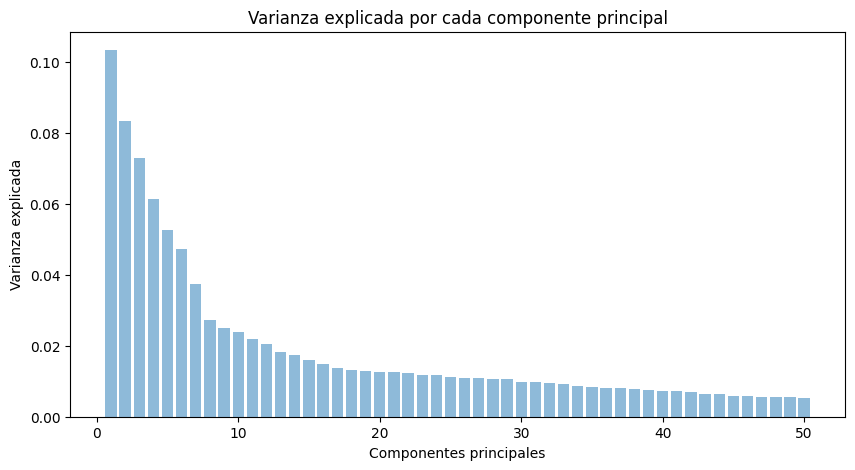

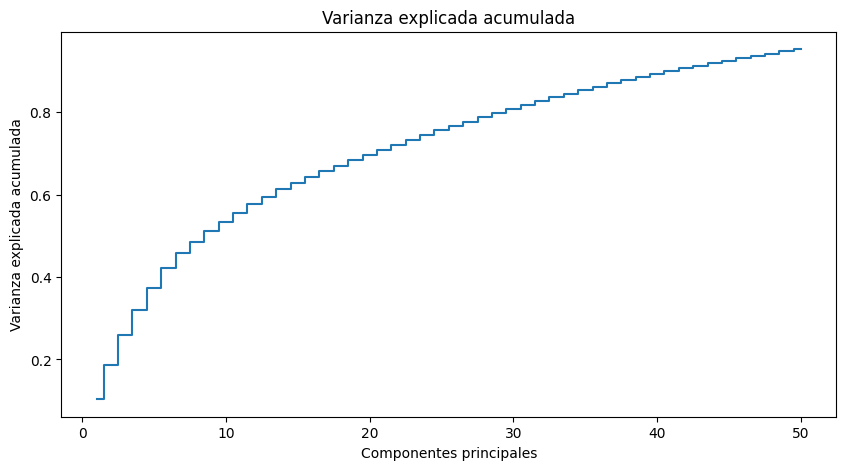

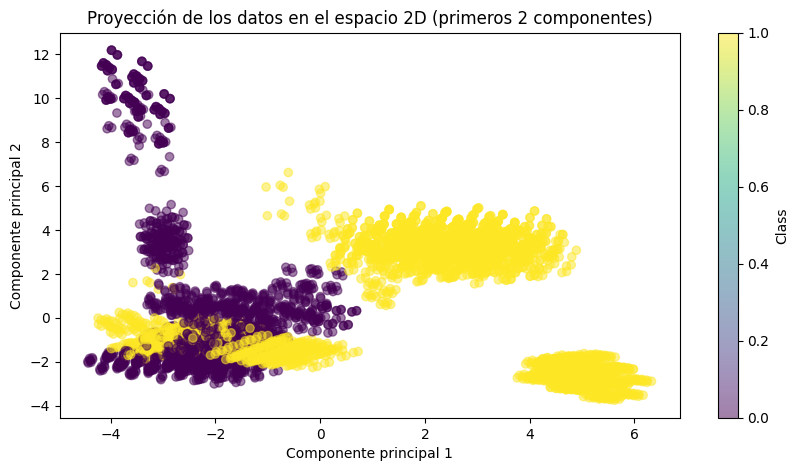

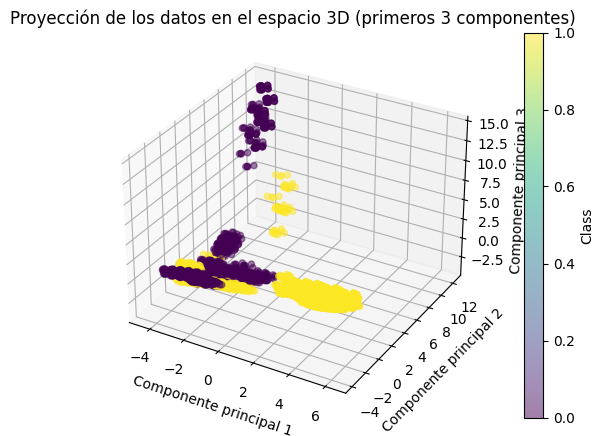

In [12]:
# Gráfico de varianza explicada por cada componente principal
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.xlabel('Componentes principales')
plt.ylabel('Varianza explicada')
plt.title('Varianza explicada por cada componente principal')
plt.show()

# Gráfico de varianza explicada acumulada
plt.figure(figsize=(10, 5))
plt.step(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), where='mid')
plt.xlabel('Componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada acumulada')
plt.show()

# Gráfico de proyección en el espacio 2D
plt.figure(figsize=(10, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Proyección de los datos en el espacio 2D (primeros 2 componentes)')
plt.colorbar(label='Class')
plt.show()

# Gráfico en 3D (requiere mpl_toolkits.mplot3d)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis', alpha=0.5)
ax.set_xlabel('Componente principal 1')
ax.set_ylabel('Componente principal 2')
ax.set_zlabel('Componente principal 3')
ax.set_title('Proyección de los datos en el espacio 3D (primeros 3 componentes)')
fig.colorbar(scatter, ax=ax, label='Class')
plt.show()

#Entrenamiento y Evaluación de Modelos

 División de Modelos

In [13]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

#Regresión Logística

In [14]:
# Entrenar el modelo de Regresión Logística
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Hacer predicciones y evaluar el modelo
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Exactitud de Regresión Logística: {accuracy_log_reg:.4f}")
print("Reporte de clasificación de Regresión Logística:")
print(classification_report(y_test, y_pred_log_reg))
print("Matriz de confusión de Regresión Logística:")
print(confusion_matrix(y_test, y_pred_log_reg))

Exactitud de Regresión Logísstica: 1.0000
Reporte de clasificación de Regresión Logísstica:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       843
        True       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Matriz de confusión de Regresión Logísstica:
[[843   0]
 [  0 782]]


#Random Forest

In [15]:
# Entrenar el modelo de Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Hacer predicciones y evaluar el modelo
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Exactitud de Random Forest: {accuracy_rf:.4f}")
print("Reporte de clasificación de Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Matriz de confusión de Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))


Exactitud de Random Forest: 1.0000
Reporte de clasificación de Random Forest:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       843
        True       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Matriz de confusión de Random Forest:
[[843   0]
 [  0 782]]


#SVM

In [16]:

# Entrenar el modelo de SVM
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train, y_train)

# Hacer predicciones y evaluar el modelo
y_pred_svm = svm_clf.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Exactitud de SVM: {accuracy_svm:.4f}")
print("Reporte de clasificación de SVM:")
print(classification_report(y_test, y_pred_svm))
print("Matriz de confusión de SVM:")
print(confusion_matrix(y_test, y_pred_svm))

Exactitud de SVM: 1.0000
Reporte de clasificación de SVM:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       843
        True       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Matriz de confusión de SVM:
[[843   0]
 [  0 782]]
